Import libraries and set the plotting parameters

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import Sequential 
from keras import layers
from keras import optimizers
from RPD import RPD
import matplotlib as mpl


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler



#set plotting defaults
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.grid'] = True

Using TensorFlow backend.


Load the data samples for training

In [2]:
filename = 'samples_20k_30min.xlsx'
samples_all = pd.read_excel(filename)

Mask the samples that were generated using no bad data and keep only those samples

In [5]:
mask = samples_all['sum_t1-n_labels']==0
samples = samples_all[mask].copy()

Generate header variables to use when indexing into the pandas dataframes and generate X, Y, and label variables

In [8]:
variables = ['solar:','temp:','speed:','dir:','u','v']

#Extract the headers associated with the X variables 
variable_headers = [var for var in samples.keys() if var.split('|')[0] in variables]
y_headers = [key for key in variable_headers if int(key.split('|')[1]) == 0]
x_headers = ['month','day','hour','minute']
x_headers.extend([key for key in variable_headers if int(key.split('|')[1]) > 0])

label_headers = ['label|{}'.format(var) for var in variables]

X = samples[x_headers].values
Y = samples[y_headers].values
labels = samples[label_headers].values

Scale the data and split into testing and training

In [9]:
y_scaler = StandardScaler()
y_scaler.fit(Y)
Y_scale = y_scaler.transform(Y)
Y_scale = Y

x_scaler = StandardScaler()
x_scaler.fit(X)
X_scale = x_scaler.transform(X)
X_scale = X

xtrain, xval, ytrain, yval,label_train,label_val = train_test_split(X_scale, Y_scale, labels, test_size=0.20, random_state=42)



Train the regression models

In [10]:
num_inputs = xtrain.shape[1]
num_outputs = ytrain.shape[1]
model = Sequential()
model.add(layers.Dense(100, input_dim=num_inputs, kernel_initializer='normal', activation='relu'))
model.add(layers.Dense(50, kernel_initializer='normal', activation='relu'))
model.add(layers.Dense(num_outputs, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(xtrain,ytrain,epochs=20,batch_size=32,
          validation_data=(xval, yval))


regressions = {}
for ind,var in enumerate(variables):
    num_inputs = xtrain.shape[1]
    num_outputs = ytrain.shape[1]
    regressions[var] = Sequential()
    regressions[var].add(layers.Dense(100, input_dim=num_inputs, kernel_initializer='normal', activation='relu'))
    regressions[var].add(layers.Dense(50, kernel_initializer='normal', activation='relu'))
    regressions[var].add(layers.Dense(1, kernel_initializer='normal'))
    
    regressions[var].compile(loss='mean_squared_error', optimizer='adam')
    
    regressions[var].fit(xtrain,ytrain[:,ind],epochs=500,batch_size=1000,
              validation_data=(xval, yval[:,ind]))


Train on 12688 samples, validate on 3173 samples
Epoch 1/20
12688/12688 [==============================] - 1s 58us/step - loss: 1070.6028 - val_loss: 321.9341
Epoch 2/20
12688/12688 [==============================] - 0s 33us/step - loss: 369.9080 - val_loss: 333.2736
Epoch 3/20
12688/12688 [==============================] - 0s 33us/step - loss: 357.2801 - val_loss: 308.7238
Epoch 4/20
12688/12688 [==============================] - 0s 33us/step - loss: 346.7893 - val_loss: 296.1304
Epoch 5/20
12688/12688 [==============================] - 0s 33us/step - loss: 343.8886 - val_loss: 313.3415
Epoch 6/20
12688/12688 [==============================] - 0s 33us/step - loss: 339.0934 - val_loss: 305.8460
Epoch 7/20
12688/12688 [==============================] - 0s 33us/step - loss: 351.3769 - val_loss: 291.7359
Epoch 8/20
12688/12688 [==============================] - 0s 33us/step - loss: 341.0846 - val_loss: 288.9746
Epoch 9/20
12688/12688 [==============================] - 0s 33us/step - loss:

12688/12688 [==============================] - 0s 3us/step - loss: 738.9119 - val_loss: 586.2767
Epoch 129/500
12688/12688 [==============================] - 0s 3us/step - loss: 730.1070 - val_loss: 586.7375
Epoch 130/500
12688/12688 [==============================] - 0s 3us/step - loss: 737.0148 - val_loss: 588.3191
Epoch 131/500
12688/12688 [==============================] - 0s 3us/step - loss: 730.1208 - val_loss: 585.4340
Epoch 132/500
12688/12688 [==============================] - 0s 3us/step - loss: 723.5489 - val_loss: 585.0955
Epoch 133/500
12688/12688 [==============================] - 0s 3us/step - loss: 725.2145 - val_loss: 584.7499
Epoch 134/500
12688/12688 [==============================] - 0s 3us/step - loss: 727.3650 - val_loss: 595.0667
Epoch 135/500
12688/12688 [==============================] - 0s 3us/step - loss: 727.6598 - val_loss: 598.5773
Epoch 136/500
12688/12688 [==============================] - 0s 3us/step - loss: 726.5689 - val_loss: 605.7227
Epoch 137/500
1

Epoch 202/500
12688/12688 [==============================] - 0s 3us/step - loss: 677.6044 - val_loss: 589.4260
Epoch 203/500
12688/12688 [==============================] - 0s 3us/step - loss: 684.5104 - val_loss: 589.2326
Epoch 204/500
12688/12688 [==============================] - 0s 3us/step - loss: 686.4176 - val_loss: 599.3856
Epoch 205/500
12688/12688 [==============================] - 0s 3us/step - loss: 692.1079 - val_loss: 592.5465
Epoch 206/500
12688/12688 [==============================] - 0s 3us/step - loss: 713.0607 - val_loss: 652.9184
Epoch 207/500
12688/12688 [==============================] - 0s 3us/step - loss: 710.6271 - val_loss: 592.6475
Epoch 208/500
12688/12688 [==============================] - 0s 3us/step - loss: 689.0083 - val_loss: 599.6522
Epoch 209/500
12688/12688 [==============================] - 0s 3us/step - loss: 679.2766 - val_loss: 592.6633
Epoch 210/500
12688/12688 [==============================] - 0s 3us/step - loss: 679.3048 - val_loss: 592.2468
E

Epoch 349/500
12688/12688 [==============================] - 0s 3us/step - loss: 629.6077 - val_loss: 612.0215
Epoch 350/500
12688/12688 [==============================] - 0s 3us/step - loss: 601.9004 - val_loss: 621.1436
Epoch 351/500
12688/12688 [==============================] - 0s 3us/step - loss: 611.5211 - val_loss: 638.8037
Epoch 352/500
12688/12688 [==============================] - 0s 3us/step - loss: 612.4449 - val_loss: 610.3613
Epoch 353/500
12688/12688 [==============================] - 0s 3us/step - loss: 604.2927 - val_loss: 640.9713
Epoch 354/500
12688/12688 [==============================] - 0s 3us/step - loss: 620.4107 - val_loss: 630.7383
Epoch 355/500
12688/12688 [==============================] - 0s 4us/step - loss: 626.8792 - val_loss: 611.5679
Epoch 356/500
12688/12688 [==============================] - 0s 4us/step - loss: 615.7890 - val_loss: 623.3068
Epoch 357/500
12688/12688 [==============================] - 0s 3us/step - loss: 603.8439 - val_loss: 613.6750
E

Epoch 423/500
12688/12688 [==============================] - 0s 3us/step - loss: 580.7854 - val_loss: 611.5559
Epoch 424/500
12688/12688 [==============================] - 0s 3us/step - loss: 572.2690 - val_loss: 610.7581
Epoch 425/500
12688/12688 [==============================] - 0s 3us/step - loss: 573.6111 - val_loss: 665.6639
Epoch 426/500
12688/12688 [==============================] - 0s 3us/step - loss: 588.6897 - val_loss: 613.6253
Epoch 427/500
12688/12688 [==============================] - 0s 3us/step - loss: 575.5593 - val_loss: 611.6832
Epoch 428/500
12688/12688 [==============================] - 0s 4us/step - loss: 567.5492 - val_loss: 631.5783
Epoch 429/500
12688/12688 [==============================] - 0s 3us/step - loss: 570.1036 - val_loss: 614.3994
Epoch 430/500
12688/12688 [==============================] - 0s 3us/step - loss: 563.3758 - val_loss: 621.7917
Epoch 431/500
12688/12688 [==============================] - 0s 3us/step - loss: 565.7299 - val_loss: 611.2204
E

Epoch 497/500
12688/12688 [==============================] - 0s 3us/step - loss: 518.3320 - val_loss: 614.6551
Epoch 498/500
12688/12688 [==============================] - 0s 3us/step - loss: 513.8227 - val_loss: 620.3810
Epoch 499/500
12688/12688 [==============================] - 0s 3us/step - loss: 515.4150 - val_loss: 615.9436
Epoch 500/500
12688/12688 [==============================] - 0s 3us/step - loss: 515.6097 - val_loss: 613.1085
Train on 12688 samples, validate on 3173 samples
Epoch 1/500
12688/12688 [==============================] - 0s 30us/step - loss: 666.2410 - val_loss: 331.6450
Epoch 2/500
12688/12688 [==============================] - 0s 3us/step - loss: 295.4511 - val_loss: 215.2786
Epoch 3/500
12688/12688 [==============================] - 0s 3us/step - loss: 164.6454 - val_loss: 100.8889
Epoch 4/500
12688/12688 [==============================] - 0s 3us/step - loss: 55.1747 - val_loss: 25.9923
Epoch 5/500
12688/12688 [==============================] - 0s 3us/step -

Epoch 150/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.6064 - val_loss: 0.6296
Epoch 151/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.6055 - val_loss: 0.6665
Epoch 152/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.5894 - val_loss: 0.6543
Epoch 153/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.6556 - val_loss: 0.6149
Epoch 154/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.5791 - val_loss: 0.6316
Epoch 155/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.6282 - val_loss: 0.6103
Epoch 156/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.6318 - val_loss: 0.5955
Epoch 157/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.6308 - val_loss: 0.7901
Epoch 158/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.6437 - val_loss: 0.5994
Epoch 159/500
12688/12688 [==========

12688/12688 [==============================] - 0s 3us/step - loss: 0.5881 - val_loss: 0.5259
Epoch 303/500
12688/12688 [==============================] - 0s 4us/step - loss: 0.6175 - val_loss: 0.8720
Epoch 304/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.5766 - val_loss: 0.5014
Epoch 305/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.4397 - val_loss: 0.5005
Epoch 306/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.5202 - val_loss: 0.5846
Epoch 307/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.5541 - val_loss: 0.5488
Epoch 308/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.6164 - val_loss: 0.5262
Epoch 309/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.5341 - val_loss: 0.6317
Epoch 310/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.4402 - val_loss: 0.4890
Epoch 311/500
12688/12688 [========================

12688/12688 [==============================] - 0s 3us/step - loss: 0.3986 - val_loss: 0.4693
Epoch 455/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.4743 - val_loss: 0.4830
Epoch 456/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.4393 - val_loss: 0.6412
Epoch 457/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.4963 - val_loss: 0.4674
Epoch 458/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.4281 - val_loss: 0.4892
Epoch 459/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.4630 - val_loss: 0.5725
Epoch 460/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.4961 - val_loss: 0.7692
Epoch 461/500
12688/12688 [==============================] - 0s 4us/step - loss: 0.4858 - val_loss: 0.5238
Epoch 462/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.3796 - val_loss: 0.4794
Epoch 463/500
12688/12688 [========================

12688/12688 [==============================] - 0s 3us/step - loss: 1.7707 - val_loss: 2.0372
Epoch 108/500
12688/12688 [==============================] - 0s 3us/step - loss: 1.6243 - val_loss: 1.7441
Epoch 109/500
12688/12688 [==============================] - 0s 3us/step - loss: 1.6834 - val_loss: 1.8806
Epoch 110/500
12688/12688 [==============================] - 0s 3us/step - loss: 1.6895 - val_loss: 1.8352
Epoch 111/500
12688/12688 [==============================] - 0s 3us/step - loss: 1.5309 - val_loss: 1.7399
Epoch 112/500
12688/12688 [==============================] - 0s 3us/step - loss: 1.6091 - val_loss: 1.7259
Epoch 113/500
12688/12688 [==============================] - 0s 3us/step - loss: 1.5473 - val_loss: 1.7769
Epoch 114/500
12688/12688 [==============================] - 0s 3us/step - loss: 1.5233 - val_loss: 1.7088
Epoch 115/500
12688/12688 [==============================] - 0s 3us/step - loss: 1.5465 - val_loss: 1.7923
Epoch 116/500
12688/12688 [========================

12688/12688 [==============================] - 0s 4us/step - loss: 1.4727 - val_loss: 1.7162
Epoch 260/500
12688/12688 [==============================] - 0s 4us/step - loss: 1.4423 - val_loss: 1.8559
Epoch 261/500
12688/12688 [==============================] - 0s 3us/step - loss: 1.4289 - val_loss: 1.6948
Epoch 262/500
12688/12688 [==============================] - 0s 3us/step - loss: 1.4373 - val_loss: 1.6749
Epoch 263/500
12688/12688 [==============================] - 0s 3us/step - loss: 1.4627 - val_loss: 1.6763
Epoch 264/500
12688/12688 [==============================] - 0s 3us/step - loss: 1.4679 - val_loss: 1.6944
Epoch 265/500
12688/12688 [==============================] - 0s 3us/step - loss: 1.4594 - val_loss: 1.6851
Epoch 266/500
12688/12688 [==============================] - 0s 3us/step - loss: 1.5886 - val_loss: 1.7531
Epoch 267/500
12688/12688 [==============================] - 0s 3us/step - loss: 1.4403 - val_loss: 1.6711
Epoch 268/500
12688/12688 [========================

12688/12688 [==============================] - 0s 3us/step - loss: 1.3818 - val_loss: 1.9130
Epoch 412/500
12688/12688 [==============================] - 0s 4us/step - loss: 1.4936 - val_loss: 1.7693
Epoch 413/500
12688/12688 [==============================] - 0s 3us/step - loss: 1.5172 - val_loss: 1.7570
Epoch 414/500
12688/12688 [==============================] - 0s 3us/step - loss: 1.4205 - val_loss: 1.7077
Epoch 415/500
12688/12688 [==============================] - 0s 3us/step - loss: 1.3693 - val_loss: 1.7346
Epoch 416/500
12688/12688 [==============================] - 0s 4us/step - loss: 1.4402 - val_loss: 1.8132
Epoch 417/500
12688/12688 [==============================] - 0s 4us/step - loss: 1.4287 - val_loss: 1.8213
Epoch 418/500
12688/12688 [==============================] - 0s 3us/step - loss: 1.3795 - val_loss: 1.7055
Epoch 419/500
12688/12688 [==============================] - 0s 3us/step - loss: 1.3576 - val_loss: 1.7150
Epoch 420/500
12688/12688 [========================

12688/12688 [==============================] - 0s 3us/step - loss: 1114.0921 - val_loss: 1084.0239
Epoch 61/500
12688/12688 [==============================] - 0s 3us/step - loss: 1111.7799 - val_loss: 1097.4570
Epoch 62/500
12688/12688 [==============================] - 0s 3us/step - loss: 1112.6978 - val_loss: 1086.5391
Epoch 63/500
12688/12688 [==============================] - 0s 3us/step - loss: 1111.4248 - val_loss: 1083.2479
Epoch 64/500
12688/12688 [==============================] - 0s 3us/step - loss: 1114.7064 - val_loss: 1086.8454
Epoch 65/500
12688/12688 [==============================] - 0s 3us/step - loss: 1112.3830 - val_loss: 1090.9806
Epoch 66/500
12688/12688 [==============================] - 0s 3us/step - loss: 1110.8414 - val_loss: 1088.1771
Epoch 67/500
12688/12688 [==============================] - 0s 3us/step - loss: 1105.5860 - val_loss: 1089.1200
Epoch 68/500
12688/12688 [==============================] - 0s 3us/step - loss: 1107.4764 - val_loss: 1086.7123
Epoch

Epoch 133/500
12688/12688 [==============================] - 0s 3us/step - loss: 1050.6756 - val_loss: 1073.2731
Epoch 134/500
12688/12688 [==============================] - 0s 3us/step - loss: 1053.1154 - val_loss: 1077.9613
Epoch 135/500
12688/12688 [==============================] - 0s 3us/step - loss: 1050.7850 - val_loss: 1095.6422
Epoch 136/500
12688/12688 [==============================] - 0s 3us/step - loss: 1054.0440 - val_loss: 1083.7727
Epoch 137/500
12688/12688 [==============================] - 0s 3us/step - loss: 1060.2887 - val_loss: 1089.6636
Epoch 138/500
12688/12688 [==============================] - 0s 6us/step - loss: 1053.0976 - val_loss: 1079.4498
Epoch 139/500
12688/12688 [==============================] - 0s 3us/step - loss: 1052.5129 - val_loss: 1069.5997
Epoch 140/500
12688/12688 [==============================] - 0s 3us/step - loss: 1045.6669 - val_loss: 1074.6423
Epoch 141/500
12688/12688 [==============================] - 0s 3us/step - loss: 1047.3460 - val

12688/12688 [==============================] - 0s 3us/step - loss: 940.2209 - val_loss: 1092.0088
Epoch 279/500
12688/12688 [==============================] - 0s 6us/step - loss: 933.0208 - val_loss: 1103.7857
Epoch 280/500
12688/12688 [==============================] - 0s 3us/step - loss: 938.9992 - val_loss: 1097.8279
Epoch 281/500
12688/12688 [==============================] - 0s 3us/step - loss: 934.8766 - val_loss: 1103.2300
Epoch 282/500
12688/12688 [==============================] - 0s 3us/step - loss: 940.2127 - val_loss: 1129.2422
Epoch 283/500
12688/12688 [==============================] - 0s 3us/step - loss: 935.5350 - val_loss: 1092.3670
Epoch 284/500
12688/12688 [==============================] - 0s 3us/step - loss: 930.2720 - val_loss: 1102.0153
Epoch 285/500
12688/12688 [==============================] - 0s 3us/step - loss: 925.4168 - val_loss: 1101.4960
Epoch 286/500
12688/12688 [==============================] - 0s 3us/step - loss: 934.6186 - val_loss: 1113.3936
Epoch 

12688/12688 [==============================] - 0s 3us/step - loss: 841.3678 - val_loss: 1141.7568
Epoch 425/500
12688/12688 [==============================] - 0s 3us/step - loss: 856.9908 - val_loss: 1150.2780
Epoch 426/500
12688/12688 [==============================] - 0s 3us/step - loss: 838.7850 - val_loss: 1146.0745
Epoch 427/500
12688/12688 [==============================] - 0s 3us/step - loss: 842.8497 - val_loss: 1165.4183
Epoch 428/500
12688/12688 [==============================] - 0s 3us/step - loss: 845.5555 - val_loss: 1138.6216
Epoch 429/500
12688/12688 [==============================] - 0s 3us/step - loss: 844.3212 - val_loss: 1153.4652
Epoch 430/500
12688/12688 [==============================] - 0s 3us/step - loss: 839.2344 - val_loss: 1148.4406
Epoch 431/500
12688/12688 [==============================] - 0s 3us/step - loss: 841.1125 - val_loss: 1146.1742
Epoch 432/500
12688/12688 [==============================] - 0s 3us/step - loss: 840.9185 - val_loss: 1151.0465
Epoch 

Epoch 74/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0463 - val_loss: 0.0631
Epoch 75/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0458 - val_loss: 0.0614
Epoch 76/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0464 - val_loss: 0.0634
Epoch 77/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0454 - val_loss: 0.0611
Epoch 78/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0464 - val_loss: 0.0615
Epoch 79/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0457 - val_loss: 0.0617
Epoch 80/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0476 - val_loss: 0.0636
Epoch 81/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0479 - val_loss: 0.0621
Epoch 82/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0459 - val_loss: 0.0632
Epoch 83/500
12688/12688 [====================

Epoch 151/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0383 - val_loss: 0.0601
Epoch 152/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0390 - val_loss: 0.0625
Epoch 153/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0410 - val_loss: 0.0621
Epoch 154/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0385 - val_loss: 0.0589
Epoch 155/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0375 - val_loss: 0.0623
Epoch 156/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0417 - val_loss: 0.0643
Epoch 157/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0389 - val_loss: 0.0615
Epoch 158/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0382 - val_loss: 0.0583
Epoch 159/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0383 - val_loss: 0.0603
Epoch 160/500
12688/12688 [==========

12688/12688 [==============================] - 0s 3us/step - loss: 0.0340 - val_loss: 0.0683
Epoch 304/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0316 - val_loss: 0.0637
Epoch 305/500
12688/12688 [==============================] - 0s 4us/step - loss: 0.0313 - val_loss: 0.0703
Epoch 306/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0333 - val_loss: 0.0658
Epoch 307/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0308 - val_loss: 0.0647
Epoch 308/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0335 - val_loss: 0.0747
Epoch 309/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0343 - val_loss: 0.0640
Epoch 310/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0306 - val_loss: 0.0643
Epoch 311/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0322 - val_loss: 0.0641
Epoch 312/500
12688/12688 [========================

12688/12688 [==============================] - 0s 3us/step - loss: 0.0287 - val_loss: 0.0729
Epoch 456/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0312 - val_loss: 0.0719
Epoch 457/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0278 - val_loss: 0.0729
Epoch 458/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0273 - val_loss: 0.0720
Epoch 459/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0267 - val_loss: 0.0718
Epoch 460/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0276 - val_loss: 0.0730
Epoch 461/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0286 - val_loss: 0.0751
Epoch 462/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0277 - val_loss: 0.0719
Epoch 463/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0288 - val_loss: 0.0775
Epoch 464/500
12688/12688 [========================

12688/12688 [==============================] - 0s 3us/step - loss: 0.0632 - val_loss: 0.0949
Epoch 109/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0661 - val_loss: 0.0854
Epoch 110/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0640 - val_loss: 0.0807
Epoch 111/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0611 - val_loss: 0.0880
Epoch 112/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0611 - val_loss: 0.0798
Epoch 113/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0607 - val_loss: 0.0822
Epoch 114/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0602 - val_loss: 0.0796
Epoch 115/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0624 - val_loss: 0.0808
Epoch 116/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0643 - val_loss: 0.0833
Epoch 117/500
12688/12688 [========================

12688/12688 [==============================] - 0s 3us/step - loss: 0.0483 - val_loss: 0.0940
Epoch 261/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0481 - val_loss: 0.0926
Epoch 262/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0488 - val_loss: 0.0985
Epoch 263/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0475 - val_loss: 0.0985
Epoch 264/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0498 - val_loss: 0.0978
Epoch 265/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0482 - val_loss: 0.1054
Epoch 266/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0548 - val_loss: 0.1043
Epoch 267/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0569 - val_loss: 0.1014
Epoch 268/500
12688/12688 [==============================] - 0s 4us/step - loss: 0.0488 - val_loss: 0.0962
Epoch 269/500
12688/12688 [========================

12688/12688 [==============================] - 0s 4us/step - loss: 0.0411 - val_loss: 0.1059
Epoch 413/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0420 - val_loss: 0.1022
Epoch 414/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0423 - val_loss: 0.1121
Epoch 415/500
12688/12688 [==============================] - 0s 13us/step - loss: 0.0481 - val_loss: 0.1085
Epoch 416/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0429 - val_loss: 0.1000
Epoch 417/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0417 - val_loss: 0.1007
Epoch 418/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0438 - val_loss: 0.1042
Epoch 419/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0462 - val_loss: 0.1026
Epoch 420/500
12688/12688 [==============================] - 0s 3us/step - loss: 0.0439 - val_loss: 0.1081
Epoch 421/500
12688/12688 [=======================

Reload the data (including the bad points) for training the classifier.  Also Inspect the output of the regression model

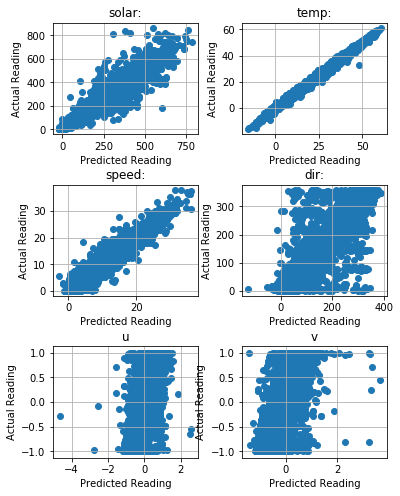

In [12]:
X = samples_all[x_headers].values
Y = samples_all[y_headers].values
labels = samples_all[label_headers].values

Y_scale = y_scaler.transform(Y)
X_scale = x_scaler.transform(X)

Y_scale = Y
X_scale = X

xtrain, xval, ytrain, yval,label_train,label_val = train_test_split(X_scale, Y_scale, labels, test_size=0.20, random_state=42)

pred = {}
rpd = {}
plt.figure(figsize=(6, 8))
for ind,var in enumerate(variables):
    pred[var] = regressions[var].predict(X_scale)
    rpd[var] = RPD(pred[var],np.array([Y_scale[:,ind]]).T)
    ax = plt.subplot(3, 2, ind+1)
    plt.subplots_adjust(hspace=0.45,wspace=0.3)
    plt.ylabel('Actual Reading')
    plt.xlabel('Predicted Reading')
    plt.scatter(pred[var],Y_scale[:,ind],label=var)
    plt.title(var)

Generate plots of RPD vs class

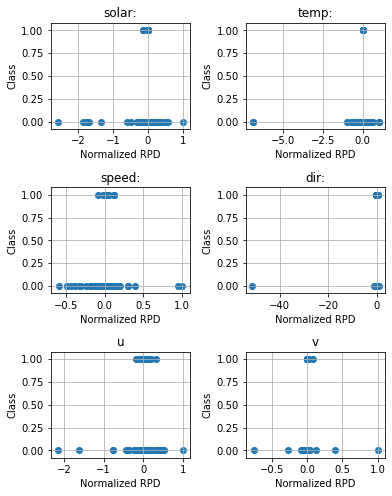

In [13]:
plt.figure(figsize=(6, 8))
for ind,var in enumerate(variables):
    ax = plt.subplot(3, 2, ind+1)
    plt.subplots_adjust(hspace=0.55,wspace=0.4)
    plt.ylabel('Class')
    plt.xlabel('Normalized RPD')
    plt.scatter(rpd[var]/max(rpd[var]),labels[:,ind])
    plt.title(var)
    plt.title(var)

Train the classifier network 
<font color=blue>
    
NOTE: This is the code I used originally with the output of the regression model.  However, because the RPD results are non-separable based on RPD, it was never updated to work with changes to the regression network.  It is included here just for completeness to demonstrate what was tried.

In [23]:

class_weight = {0:1,
                1:labels.shape[0]*labels.shape[1]/labels.sum()} 
    
classifiers = {}
for ind,var in enumerate(variables):
    
    classifiers[var] = Sequential()
    classifiers[var].add(layers.Dense(50, input_dim=rpd_unnorm.shape[1], kernel_initializer='normal', activation='relu'))
    classifiers[var].add(layers.Dense(50, kernel_initializer='normal', activation='relu'))
    classifiers[var].add(layers.Dense(1, kernel_initializer='normal', activation='sigmoid'))
    
    sgd = optimizers.Adam(learning_rate=0.005, decay=0.95)
    
    classifiers[var].compile(loss='binary_crossentropy', 
                        optimizer=sgd,
                        metrics = ['accuracy'])
    
    classifiers[var].fit(rpd_unnorm,label_train[:,ind],epochs=20,batch_size=32,
               class_weight = class_weight,
              validation_data=(rpd_val, label_val[:,ind]))

NameError: name 'rpd_unnorm' is not defined

Change directions and try to directly classify the data using a MLP network.  The settings given here represent the best operation I was able to obtain.

First step: reload and rescale the data to make sure we're working with the correct subsets of the data.  

<font color=blue>

NOTE: For the regression model, the time0 samples were left out and used to generate the y values.  For the direct classifier, the data from all timesteps was used to predict the label.

In [25]:
X = samples_all[variable_headers].values
labels = samples_all[label_headers].values


x_scaler = StandardScaler()
x_scaler.fit(X)
X_scale = x_scaler.transform(X)
X_scale = X

xtrain, xval, ytrain, yval,label_train,label_val = train_test_split(X_scale, Y_scale, labels, test_size=0.20, random_state=42)



Generate a class weight array for use during training

In [26]:
weight_fraction = labels.shape[0]/sum(labels)

Train the direct classifier and generate a plot of training and testing accuracy

Train on 16000 samples, validate on 4000 samples
Epoch 1/1000
16000/16000 [==============================] - 0s 26us/step - loss: 1.5594 - accuracy: 0.6162 - val_loss: 0.5234 - val_accuracy: 0.7945
Epoch 2/1000
16000/16000 [==============================] - 0s 3us/step - loss: 1.2987 - accuracy: 0.6752 - val_loss: 0.2973 - val_accuracy: 0.9095
Epoch 3/1000
16000/16000 [==============================] - 0s 3us/step - loss: 1.2041 - accuracy: 0.8104 - val_loss: 0.8168 - val_accuracy: 0.5982
Epoch 4/1000
16000/16000 [==============================] - 0s 3us/step - loss: 1.0833 - accuracy: 0.8154 - val_loss: 0.4654 - val_accuracy: 0.8322
Epoch 5/1000
16000/16000 [==============================] - 0s 3us/step - loss: 1.0532 - accuracy: 0.7996 - val_loss: 0.3283 - val_accuracy: 0.8928
Epoch 6/1000
16000/16000 [==============================] - 0s 3us/step - loss: 1.0523 - accuracy: 0.7977 - val_loss: 0.4835 - val_accuracy: 0.7878
Epoch 7/1000
16000/16000 [==============================] - 0s

16000/16000 [==============================] - 0s 3us/step - loss: 0.2781 - accuracy: 0.9308 - val_loss: 0.1300 - val_accuracy: 0.9470
Epoch 111/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.2791 - accuracy: 0.9366 - val_loss: 0.1593 - val_accuracy: 0.9375
Epoch 112/1000
16000/16000 [==============================] - 0s 2us/step - loss: 0.2863 - accuracy: 0.9366 - val_loss: 0.2726 - val_accuracy: 0.9015
Epoch 113/1000
16000/16000 [==============================] - 0s 2us/step - loss: 0.3197 - accuracy: 0.9273 - val_loss: 0.2649 - val_accuracy: 0.8965
Epoch 114/1000
16000/16000 [==============================] - 0s 2us/step - loss: 0.3487 - accuracy: 0.9174 - val_loss: 0.3040 - val_accuracy: 0.8932
Epoch 115/1000
16000/16000 [==============================] - 0s 2us/step - loss: 0.3649 - accuracy: 0.9187 - val_loss: 0.2189 - val_accuracy: 0.9172
Epoch 116/1000
16000/16000 [==============================] - 0s 2us/step - loss: 0.3302 - accuracy: 0.9165 - val_l

Epoch 219/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1536 - accuracy: 0.9614 - val_loss: 0.1022 - val_accuracy: 0.9665
Epoch 220/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1416 - accuracy: 0.9675 - val_loss: 0.0984 - val_accuracy: 0.9663
Epoch 221/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1431 - accuracy: 0.9688 - val_loss: 0.0978 - val_accuracy: 0.9695
Epoch 222/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1325 - accuracy: 0.9668 - val_loss: 0.0937 - val_accuracy: 0.9685
Epoch 223/1000
16000/16000 [==============================] - 0s 2us/step - loss: 0.1282 - accuracy: 0.9681 - val_loss: 0.0811 - val_accuracy: 0.9730
Epoch 224/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1510 - accuracy: 0.9628 - val_loss: 0.1231 - val_accuracy: 0.9578
Epoch 225/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1445 - accuracy:

Epoch 328/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1198 - accuracy: 0.9713 - val_loss: 0.1102 - val_accuracy: 0.9638
Epoch 329/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1123 - accuracy: 0.9698 - val_loss: 0.0884 - val_accuracy: 0.9693
Epoch 330/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.0913 - accuracy: 0.9762 - val_loss: 0.0701 - val_accuracy: 0.9780
Epoch 331/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.0962 - accuracy: 0.9761 - val_loss: 0.0720 - val_accuracy: 0.9780
Epoch 332/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.0873 - accuracy: 0.9812 - val_loss: 0.0890 - val_accuracy: 0.9705
Epoch 333/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.0894 - accuracy: 0.9745 - val_loss: 0.0641 - val_accuracy: 0.9827
Epoch 334/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.0789 - accuracy:

Epoch 437/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.0923 - accuracy: 0.9754 - val_loss: 0.0866 - val_accuracy: 0.9722
Epoch 438/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.0898 - accuracy: 0.9818 - val_loss: 0.1047 - val_accuracy: 0.9655
Epoch 439/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1037 - accuracy: 0.9730 - val_loss: 0.0792 - val_accuracy: 0.9778
Epoch 440/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1137 - accuracy: 0.9750 - val_loss: 0.1562 - val_accuracy: 0.9550
Epoch 441/1000
16000/16000 [==============================] - 0s 2us/step - loss: 0.1311 - accuracy: 0.9693 - val_loss: 0.1295 - val_accuracy: 0.9600
Epoch 442/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1072 - accuracy: 0.9736 - val_loss: 0.0832 - val_accuracy: 0.9762
Epoch 443/1000
16000/16000 [==============================] - 0s 2us/step - loss: 0.1788 - accuracy:

Epoch 546/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.0434 - accuracy: 0.9896 - val_loss: 0.0648 - val_accuracy: 0.9865
Epoch 547/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.0409 - accuracy: 0.9905 - val_loss: 0.0705 - val_accuracy: 0.9835
Epoch 548/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.0393 - accuracy: 0.9899 - val_loss: 0.0626 - val_accuracy: 0.9872
Epoch 549/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.0466 - accuracy: 0.9890 - val_loss: 0.0782 - val_accuracy: 0.9800
Epoch 550/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.0494 - accuracy: 0.9889 - val_loss: 0.0796 - val_accuracy: 0.9790
Epoch 551/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.0466 - accuracy: 0.9889 - val_loss: 0.0698 - val_accuracy: 0.9847
Epoch 552/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.0473 - accuracy:

Epoch 655/1000
16000/16000 [==============================] - 0s 2us/step - loss: 0.0774 - accuracy: 0.9807 - val_loss: 0.0942 - val_accuracy: 0.9768
Epoch 656/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.0744 - accuracy: 0.9836 - val_loss: 0.0896 - val_accuracy: 0.9753
Epoch 657/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.0635 - accuracy: 0.9862 - val_loss: 0.0922 - val_accuracy: 0.9750
Epoch 658/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.0623 - accuracy: 0.9834 - val_loss: 0.0702 - val_accuracy: 0.9855
Epoch 659/1000
16000/16000 [==============================] - 0s 2us/step - loss: 0.0608 - accuracy: 0.9846 - val_loss: 0.0885 - val_accuracy: 0.9805
Epoch 660/1000
16000/16000 [==============================] - 0s 2us/step - loss: 0.0529 - accuracy: 0.9891 - val_loss: 0.0668 - val_accuracy: 0.9852
Epoch 661/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.0609 - accuracy:

Epoch 764/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1306 - accuracy: 0.9716 - val_loss: 0.0877 - val_accuracy: 0.9755
Epoch 765/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1218 - accuracy: 0.9624 - val_loss: 0.0833 - val_accuracy: 0.9760
Epoch 766/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1094 - accuracy: 0.9774 - val_loss: 0.1057 - val_accuracy: 0.9693
Epoch 767/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1112 - accuracy: 0.9759 - val_loss: 0.0980 - val_accuracy: 0.9750
Epoch 768/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.0887 - accuracy: 0.9759 - val_loss: 0.0811 - val_accuracy: 0.9805
Epoch 769/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.0753 - accuracy: 0.9807 - val_loss: 0.0773 - val_accuracy: 0.9818
Epoch 770/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.0625 - accuracy:

Epoch 873/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.0445 - accuracy: 0.9894 - val_loss: 0.0880 - val_accuracy: 0.9783
Epoch 874/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.0574 - accuracy: 0.9898 - val_loss: 0.1083 - val_accuracy: 0.9720
Epoch 875/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1083 - accuracy: 0.9743 - val_loss: 0.0895 - val_accuracy: 0.9770
Epoch 876/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.0841 - accuracy: 0.9760 - val_loss: 0.0962 - val_accuracy: 0.9803
Epoch 877/1000
16000/16000 [==============================] - 0s 2us/step - loss: 0.1495 - accuracy: 0.9674 - val_loss: 0.1023 - val_accuracy: 0.9785
Epoch 878/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.4731 - accuracy: 0.9183 - val_loss: 0.2536 - val_accuracy: 0.9340
Epoch 879/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5078 - accuracy:

Epoch 982/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.0294 - accuracy: 0.9928 - val_loss: 0.0751 - val_accuracy: 0.9850
Epoch 983/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.0287 - accuracy: 0.9925 - val_loss: 0.0755 - val_accuracy: 0.9847
Epoch 984/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.0277 - accuracy: 0.9921 - val_loss: 0.0728 - val_accuracy: 0.9858
Epoch 985/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.0290 - accuracy: 0.9933 - val_loss: 0.0753 - val_accuracy: 0.9837
Epoch 986/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.0284 - accuracy: 0.9927 - val_loss: 0.0738 - val_accuracy: 0.9847
Epoch 987/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.0281 - accuracy: 0.9921 - val_loss: 0.0746 - val_accuracy: 0.9847
Epoch 988/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.0288 - accuracy:

Epoch 91/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5347 - accuracy: 0.8217 - val_loss: 0.3988 - val_accuracy: 0.7915
Epoch 92/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5068 - accuracy: 0.8481 - val_loss: 0.3762 - val_accuracy: 0.7995
Epoch 93/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5015 - accuracy: 0.8416 - val_loss: 0.3909 - val_accuracy: 0.8083
Epoch 94/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5054 - accuracy: 0.8338 - val_loss: 0.3229 - val_accuracy: 0.8305
Epoch 95/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5255 - accuracy: 0.8286 - val_loss: 0.3103 - val_accuracy: 0.8330
Epoch 96/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.4907 - accuracy: 0.8421 - val_loss: 0.3159 - val_accuracy: 0.8388
Epoch 97/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.4801 - accuracy: 0.8455

Epoch 200/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.4514 - accuracy: 0.8518 - val_loss: 0.3048 - val_accuracy: 0.8298
Epoch 201/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.4609 - accuracy: 0.8418 - val_loss: 0.3921 - val_accuracy: 0.8087
Epoch 202/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.4597 - accuracy: 0.8621 - val_loss: 0.4109 - val_accuracy: 0.8108
Epoch 203/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.4670 - accuracy: 0.8346 - val_loss: 0.1907 - val_accuracy: 0.8913
Epoch 204/1000
16000/16000 [==============================] - 0s 2us/step - loss: 0.5788 - accuracy: 0.8291 - val_loss: 0.2995 - val_accuracy: 0.8363
Epoch 205/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5095 - accuracy: 0.8438 - val_loss: 0.4301 - val_accuracy: 0.7922
Epoch 206/1000
16000/16000 [==============================] - 0s 2us/step - loss: 0.5065 - accuracy:

Epoch 309/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.3995 - accuracy: 0.8668 - val_loss: 0.2180 - val_accuracy: 0.8860
Epoch 310/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.3521 - accuracy: 0.8780 - val_loss: 0.2240 - val_accuracy: 0.8850
Epoch 311/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.3536 - accuracy: 0.8804 - val_loss: 0.2320 - val_accuracy: 0.8730
Epoch 312/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.3484 - accuracy: 0.8804 - val_loss: 0.2301 - val_accuracy: 0.8852
Epoch 313/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.3455 - accuracy: 0.8783 - val_loss: 0.2536 - val_accuracy: 0.8640
Epoch 314/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.3398 - accuracy: 0.8828 - val_loss: 0.2980 - val_accuracy: 0.8618
Epoch 315/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.3358 - accuracy:

Epoch 418/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.3085 - accuracy: 0.8946 - val_loss: 0.2359 - val_accuracy: 0.8890
Epoch 419/1000
16000/16000 [==============================] - 0s 6us/step - loss: 0.3027 - accuracy: 0.8981 - val_loss: 0.2576 - val_accuracy: 0.8863
Epoch 420/1000
16000/16000 [==============================] - 0s 4us/step - loss: 0.3165 - accuracy: 0.9051 - val_loss: 0.3383 - val_accuracy: 0.8453
Epoch 421/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.3517 - accuracy: 0.8949 - val_loss: 0.3888 - val_accuracy: 0.8320
Epoch 422/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.4065 - accuracy: 0.8635 - val_loss: 0.3378 - val_accuracy: 0.8410
Epoch 423/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.3584 - accuracy: 0.8867 - val_loss: 0.3191 - val_accuracy: 0.8712
Epoch 424/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.4082 - accuracy:

Epoch 527/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.2127 - accuracy: 0.9398 - val_loss: 0.2267 - val_accuracy: 0.9022
Epoch 528/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.2637 - accuracy: 0.9103 - val_loss: 0.1362 - val_accuracy: 0.9370
Epoch 529/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.2271 - accuracy: 0.9233 - val_loss: 0.1509 - val_accuracy: 0.9280
Epoch 530/1000
16000/16000 [==============================] - 0s 2us/step - loss: 0.2137 - accuracy: 0.9323 - val_loss: 0.2276 - val_accuracy: 0.8997
Epoch 531/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.2300 - accuracy: 0.9281 - val_loss: 0.1968 - val_accuracy: 0.9175
Epoch 532/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.2098 - accuracy: 0.9286 - val_loss: 0.1734 - val_accuracy: 0.9225
Epoch 533/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.2072 - accuracy:

Epoch 636/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.2019 - accuracy: 0.9457 - val_loss: 0.1534 - val_accuracy: 0.9388
Epoch 637/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.2119 - accuracy: 0.9301 - val_loss: 0.1766 - val_accuracy: 0.9310
Epoch 638/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1919 - accuracy: 0.9406 - val_loss: 0.1787 - val_accuracy: 0.9290
Epoch 639/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1960 - accuracy: 0.9416 - val_loss: 0.1802 - val_accuracy: 0.9262
Epoch 640/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1716 - accuracy: 0.9481 - val_loss: 0.1608 - val_accuracy: 0.9355
Epoch 641/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1671 - accuracy: 0.9457 - val_loss: 0.1423 - val_accuracy: 0.9460
Epoch 642/1000
16000/16000 [==============================] - 0s 2us/step - loss: 0.1632 - accuracy:

Epoch 745/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.2108 - accuracy: 0.9368 - val_loss: 0.2036 - val_accuracy: 0.9185
Epoch 746/1000
16000/16000 [==============================] - 0s 4us/step - loss: 0.2726 - accuracy: 0.9315 - val_loss: 0.1773 - val_accuracy: 0.9283
Epoch 747/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.4534 - accuracy: 0.8979 - val_loss: 0.3996 - val_accuracy: 0.8723
Epoch 748/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.4313 - accuracy: 0.8867 - val_loss: 0.3182 - val_accuracy: 0.8800
Epoch 749/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.3767 - accuracy: 0.8948 - val_loss: 0.3036 - val_accuracy: 0.8770
Epoch 750/1000
16000/16000 [==============================] - 0s 2us/step - loss: 0.4530 - accuracy: 0.8819 - val_loss: 0.3230 - val_accuracy: 0.8820
Epoch 751/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.4075 - accuracy:

Epoch 854/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1732 - accuracy: 0.9526 - val_loss: 0.1710 - val_accuracy: 0.9330
Epoch 855/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1681 - accuracy: 0.9420 - val_loss: 0.1237 - val_accuracy: 0.9500
Epoch 856/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1877 - accuracy: 0.9486 - val_loss: 0.2151 - val_accuracy: 0.9180
Epoch 857/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1805 - accuracy: 0.9392 - val_loss: 0.1259 - val_accuracy: 0.9480
Epoch 858/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1732 - accuracy: 0.9505 - val_loss: 0.1645 - val_accuracy: 0.9342
Epoch 859/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1649 - accuracy: 0.9489 - val_loss: 0.1445 - val_accuracy: 0.9405
Epoch 860/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1746 - accuracy:

Epoch 963/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1626 - accuracy: 0.9541 - val_loss: 0.1850 - val_accuracy: 0.9380
Epoch 964/1000
16000/16000 [==============================] - 0s 2us/step - loss: 0.1937 - accuracy: 0.9428 - val_loss: 0.1253 - val_accuracy: 0.9565
Epoch 965/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1666 - accuracy: 0.9536 - val_loss: 0.1883 - val_accuracy: 0.9390
Epoch 966/1000
16000/16000 [==============================] - 0s 2us/step - loss: 0.1556 - accuracy: 0.9545 - val_loss: 0.1486 - val_accuracy: 0.9470
Epoch 967/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1502 - accuracy: 0.9588 - val_loss: 0.1539 - val_accuracy: 0.9467
Epoch 968/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1459 - accuracy: 0.9522 - val_loss: 0.1312 - val_accuracy: 0.9535
Epoch 969/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1332 - accuracy:

Epoch 72/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5946 - accuracy: 0.8073 - val_loss: 0.3196 - val_accuracy: 0.8170
Epoch 73/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5789 - accuracy: 0.8192 - val_loss: 0.6051 - val_accuracy: 0.7258
Epoch 74/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6059 - accuracy: 0.8051 - val_loss: 0.3096 - val_accuracy: 0.8232
Epoch 75/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6106 - accuracy: 0.7805 - val_loss: 0.2748 - val_accuracy: 0.8338
Epoch 76/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5748 - accuracy: 0.8236 - val_loss: 0.3389 - val_accuracy: 0.8227
Epoch 77/1000
16000/16000 [==============================] - 0s 2us/step - loss: 0.5731 - accuracy: 0.8164 - val_loss: 0.3600 - val_accuracy: 0.8065
Epoch 78/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5641 - accuracy: 0.8221

Epoch 127/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5163 - accuracy: 0.8275 - val_loss: 0.3244 - val_accuracy: 0.8338
Epoch 128/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.4878 - accuracy: 0.8372 - val_loss: 0.3597 - val_accuracy: 0.8130
Epoch 129/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5253 - accuracy: 0.8463 - val_loss: 0.4450 - val_accuracy: 0.7868
Epoch 130/1000
16000/16000 [==============================] - 0s 4us/step - loss: 0.5509 - accuracy: 0.8050 - val_loss: 0.3738 - val_accuracy: 0.7825
Epoch 131/1000
16000/16000 [==============================] - 0s 4us/step - loss: 0.5210 - accuracy: 0.8283 - val_loss: 0.2988 - val_accuracy: 0.8288
Epoch 132/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5006 - accuracy: 0.8245 - val_loss: 0.3290 - val_accuracy: 0.8067
Epoch 133/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.4994 - accuracy:

16000/16000 [==============================] - 0s 3us/step - loss: 0.4251 - accuracy: 0.8629 - val_loss: 0.2919 - val_accuracy: 0.8480
Epoch 236/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.4446 - accuracy: 0.8579 - val_loss: 0.2600 - val_accuracy: 0.8622
Epoch 237/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.4354 - accuracy: 0.8478 - val_loss: 0.2171 - val_accuracy: 0.8765
Epoch 238/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.4275 - accuracy: 0.8714 - val_loss: 0.4254 - val_accuracy: 0.8105
Epoch 239/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.4712 - accuracy: 0.8515 - val_loss: 0.4142 - val_accuracy: 0.8102
Epoch 240/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.4353 - accuracy: 0.8556 - val_loss: 0.2500 - val_accuracy: 0.8615
Epoch 241/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.4476 - accuracy: 0.8517 - val_l

Epoch 290/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.4269 - accuracy: 0.8741 - val_loss: 0.2754 - val_accuracy: 0.8612
Epoch 291/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.4367 - accuracy: 0.8413 - val_loss: 0.2486 - val_accuracy: 0.8460
Epoch 292/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.4231 - accuracy: 0.8499 - val_loss: 0.2163 - val_accuracy: 0.8800
Epoch 293/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.3878 - accuracy: 0.8687 - val_loss: 0.3210 - val_accuracy: 0.8372
Epoch 294/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.3704 - accuracy: 0.8659 - val_loss: 0.2516 - val_accuracy: 0.8685
Epoch 295/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.3485 - accuracy: 0.8824 - val_loss: 0.3180 - val_accuracy: 0.8382
Epoch 296/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.3498 - accuracy:

16000/16000 [==============================] - 0s 3us/step - loss: 0.3087 - accuracy: 0.9038 - val_loss: 0.1858 - val_accuracy: 0.9128
Epoch 399/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.2758 - accuracy: 0.9082 - val_loss: 0.1988 - val_accuracy: 0.9055
Epoch 400/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.2600 - accuracy: 0.9195 - val_loss: 0.2309 - val_accuracy: 0.8905
Epoch 401/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.2523 - accuracy: 0.9185 - val_loss: 0.2099 - val_accuracy: 0.9028
Epoch 402/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.2397 - accuracy: 0.9207 - val_loss: 0.1772 - val_accuracy: 0.9185
Epoch 403/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.2475 - accuracy: 0.9159 - val_loss: 0.1273 - val_accuracy: 0.9440
Epoch 404/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.2622 - accuracy: 0.9204 - val_l

Epoch 453/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.2463 - accuracy: 0.9274 - val_loss: 0.2333 - val_accuracy: 0.9035
Epoch 454/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.2766 - accuracy: 0.9123 - val_loss: 0.1680 - val_accuracy: 0.9245
Epoch 455/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.2423 - accuracy: 0.9240 - val_loss: 0.1544 - val_accuracy: 0.9302
Epoch 456/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.2343 - accuracy: 0.9306 - val_loss: 0.2054 - val_accuracy: 0.9100
Epoch 457/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.2510 - accuracy: 0.9143 - val_loss: 0.1733 - val_accuracy: 0.9172
Epoch 458/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.2309 - accuracy: 0.9295 - val_loss: 0.1727 - val_accuracy: 0.9260
Epoch 459/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.2540 - accuracy:

Epoch 562/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.3133 - accuracy: 0.9181 - val_loss: 0.2668 - val_accuracy: 0.8950
Epoch 563/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.3947 - accuracy: 0.8845 - val_loss: 0.3328 - val_accuracy: 0.8600
Epoch 564/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.4066 - accuracy: 0.8745 - val_loss: 0.2038 - val_accuracy: 0.9170
Epoch 565/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.3095 - accuracy: 0.9020 - val_loss: 0.1321 - val_accuracy: 0.9448
Epoch 566/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.2822 - accuracy: 0.9184 - val_loss: 0.2373 - val_accuracy: 0.9070
Epoch 567/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.2412 - accuracy: 0.9306 - val_loss: 0.1834 - val_accuracy: 0.9233
Epoch 568/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.2468 - accuracy:

Epoch 671/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1859 - accuracy: 0.9461 - val_loss: 0.1752 - val_accuracy: 0.9340
Epoch 672/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1859 - accuracy: 0.9407 - val_loss: 0.1742 - val_accuracy: 0.9380
Epoch 673/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1755 - accuracy: 0.9496 - val_loss: 0.1459 - val_accuracy: 0.9477
Epoch 674/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1592 - accuracy: 0.9492 - val_loss: 0.1557 - val_accuracy: 0.9448
Epoch 675/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1536 - accuracy: 0.9539 - val_loss: 0.1376 - val_accuracy: 0.9517
Epoch 676/1000
16000/16000 [==============================] - 0s 2us/step - loss: 0.2000 - accuracy: 0.9435 - val_loss: 0.2172 - val_accuracy: 0.9172
Epoch 677/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.2226 - accuracy:

Epoch 780/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1152 - accuracy: 0.9648 - val_loss: 0.1153 - val_accuracy: 0.9660
Epoch 781/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1082 - accuracy: 0.9672 - val_loss: 0.1244 - val_accuracy: 0.9607
Epoch 782/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1127 - accuracy: 0.9682 - val_loss: 0.1444 - val_accuracy: 0.9563
Epoch 783/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1050 - accuracy: 0.9670 - val_loss: 0.1211 - val_accuracy: 0.9632
Epoch 784/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1053 - accuracy: 0.9709 - val_loss: 0.1430 - val_accuracy: 0.9563
Epoch 785/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1258 - accuracy: 0.9625 - val_loss: 0.1461 - val_accuracy: 0.9520
Epoch 786/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1192 - accuracy:

16000/16000 [==============================] - 0s 3us/step - loss: 0.1015 - accuracy: 0.9730 - val_loss: 0.1488 - val_accuracy: 0.9615
Epoch 889/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1134 - accuracy: 0.9720 - val_loss: 0.1666 - val_accuracy: 0.9513
Epoch 890/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1533 - accuracy: 0.9556 - val_loss: 0.1621 - val_accuracy: 0.9510
Epoch 891/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1442 - accuracy: 0.9589 - val_loss: 0.1681 - val_accuracy: 0.9520
Epoch 892/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1198 - accuracy: 0.9718 - val_loss: 0.1716 - val_accuracy: 0.9505
Epoch 893/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1339 - accuracy: 0.9571 - val_loss: 0.1408 - val_accuracy: 0.9578
Epoch 894/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1138 - accuracy: 0.9714 - val_l

Epoch 943/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.2373 - accuracy: 0.9237 - val_loss: 0.1952 - val_accuracy: 0.9197
Epoch 944/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.2163 - accuracy: 0.9298 - val_loss: 0.2013 - val_accuracy: 0.9195
Epoch 945/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.2050 - accuracy: 0.9354 - val_loss: 0.1770 - val_accuracy: 0.9327
Epoch 946/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1883 - accuracy: 0.9373 - val_loss: 0.1523 - val_accuracy: 0.9410
Epoch 947/1000
16000/16000 [==============================] - 0s 2us/step - loss: 0.1794 - accuracy: 0.9460 - val_loss: 0.1698 - val_accuracy: 0.9385
Epoch 948/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1558 - accuracy: 0.9574 - val_loss: 0.1779 - val_accuracy: 0.9358
Epoch 949/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.1543 - accuracy:

Epoch 52/1000
16000/16000 [==============================] - 0s 3us/step - loss: 1.1154 - accuracy: 0.5357 - val_loss: 0.7003 - val_accuracy: 0.5947
Epoch 53/1000
16000/16000 [==============================] - 0s 3us/step - loss: 1.1216 - accuracy: 0.5556 - val_loss: 0.6825 - val_accuracy: 0.5707
Epoch 54/1000
16000/16000 [==============================] - 0s 3us/step - loss: 1.1127 - accuracy: 0.5343 - val_loss: 0.6888 - val_accuracy: 0.5500
Epoch 55/1000
16000/16000 [==============================] - 0s 3us/step - loss: 1.1083 - accuracy: 0.5931 - val_loss: 0.6987 - val_accuracy: 0.5408
Epoch 56/1000
16000/16000 [==============================] - 0s 3us/step - loss: 1.1013 - accuracy: 0.5525 - val_loss: 0.6659 - val_accuracy: 0.6310
Epoch 57/1000
16000/16000 [==============================] - 0s 3us/step - loss: 1.0956 - accuracy: 0.5923 - val_loss: 0.6697 - val_accuracy: 0.6342
Epoch 58/1000
16000/16000 [==============================] - 0s 3us/step - loss: 1.0894 - accuracy: 0.5834

Epoch 107/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.9776 - accuracy: 0.6808 - val_loss: 0.6210 - val_accuracy: 0.7212
Epoch 108/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.9800 - accuracy: 0.7005 - val_loss: 0.7110 - val_accuracy: 0.5970
Epoch 109/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.9850 - accuracy: 0.6772 - val_loss: 0.7049 - val_accuracy: 0.5972
Epoch 110/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.9791 - accuracy: 0.6721 - val_loss: 0.6330 - val_accuracy: 0.6942
Epoch 111/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.9778 - accuracy: 0.7012 - val_loss: 0.6920 - val_accuracy: 0.6158
Epoch 112/1000
16000/16000 [==============================] - 0s 2us/step - loss: 0.9771 - accuracy: 0.6826 - val_loss: 0.6930 - val_accuracy: 0.6305
Epoch 113/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.9732 - accuracy:

16000/16000 [==============================] - 0s 3us/step - loss: 0.8524 - accuracy: 0.7387 - val_loss: 0.6339 - val_accuracy: 0.7095
Epoch 216/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.8576 - accuracy: 0.7465 - val_loss: 0.6793 - val_accuracy: 0.6607
Epoch 217/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.8593 - accuracy: 0.7259 - val_loss: 0.7345 - val_accuracy: 0.6143
Epoch 218/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.8551 - accuracy: 0.7296 - val_loss: 0.6428 - val_accuracy: 0.7045
Epoch 219/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.8563 - accuracy: 0.7436 - val_loss: 0.6613 - val_accuracy: 0.6873
Epoch 220/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.8539 - accuracy: 0.7347 - val_loss: 0.6328 - val_accuracy: 0.7185
Epoch 221/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.8621 - accuracy: 0.7511 - val_l

Epoch 324/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.8041 - accuracy: 0.7631 - val_loss: 0.6353 - val_accuracy: 0.7448
Epoch 325/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7926 - accuracy: 0.7623 - val_loss: 0.7607 - val_accuracy: 0.6425
Epoch 326/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7845 - accuracy: 0.7574 - val_loss: 0.7255 - val_accuracy: 0.6658
Epoch 327/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7777 - accuracy: 0.7599 - val_loss: 0.6523 - val_accuracy: 0.7290
Epoch 328/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7746 - accuracy: 0.7730 - val_loss: 0.6999 - val_accuracy: 0.6877
Epoch 329/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7723 - accuracy: 0.7661 - val_loss: 0.7239 - val_accuracy: 0.6633
Epoch 330/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7714 - accuracy:

Epoch 433/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7093 - accuracy: 0.7876 - val_loss: 0.8062 - val_accuracy: 0.6737
Epoch 434/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7158 - accuracy: 0.7878 - val_loss: 0.7232 - val_accuracy: 0.7150
Epoch 435/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7143 - accuracy: 0.7820 - val_loss: 0.7776 - val_accuracy: 0.6745
Epoch 436/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7152 - accuracy: 0.7923 - val_loss: 0.7384 - val_accuracy: 0.7040
Epoch 437/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7185 - accuracy: 0.7851 - val_loss: 0.7971 - val_accuracy: 0.6653
Epoch 438/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7044 - accuracy: 0.7820 - val_loss: 0.7130 - val_accuracy: 0.7245
Epoch 439/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7062 - accuracy:

Epoch 542/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6672 - accuracy: 0.8070 - val_loss: 0.7993 - val_accuracy: 0.7100
Epoch 543/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6545 - accuracy: 0.8073 - val_loss: 0.7961 - val_accuracy: 0.7100
Epoch 544/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6550 - accuracy: 0.8101 - val_loss: 0.7966 - val_accuracy: 0.6995
Epoch 545/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6509 - accuracy: 0.8090 - val_loss: 0.7885 - val_accuracy: 0.7243
Epoch 546/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6484 - accuracy: 0.8098 - val_loss: 0.8075 - val_accuracy: 0.6998
Epoch 547/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6488 - accuracy: 0.8126 - val_loss: 0.7822 - val_accuracy: 0.7145
Epoch 548/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6516 - accuracy:

Epoch 651/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6135 - accuracy: 0.8282 - val_loss: 0.8468 - val_accuracy: 0.7128
Epoch 652/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6207 - accuracy: 0.8176 - val_loss: 0.8339 - val_accuracy: 0.7225
Epoch 653/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6138 - accuracy: 0.8237 - val_loss: 0.8433 - val_accuracy: 0.7163
Epoch 654/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6056 - accuracy: 0.8259 - val_loss: 0.8933 - val_accuracy: 0.6808
Epoch 655/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6098 - accuracy: 0.8142 - val_loss: 0.8117 - val_accuracy: 0.7405
Epoch 656/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6012 - accuracy: 0.8245 - val_loss: 0.8234 - val_accuracy: 0.7168
Epoch 657/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6025 - accuracy:

16000/16000 [==============================] - 0s 3us/step - loss: 0.5805 - accuracy: 0.8299 - val_loss: 0.8823 - val_accuracy: 0.7343
Epoch 760/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5783 - accuracy: 0.8305 - val_loss: 0.8496 - val_accuracy: 0.7542
Epoch 761/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5833 - accuracy: 0.8250 - val_loss: 0.8613 - val_accuracy: 0.7517
Epoch 762/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5738 - accuracy: 0.8362 - val_loss: 0.9200 - val_accuracy: 0.7132
Epoch 763/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5681 - accuracy: 0.8338 - val_loss: 0.8574 - val_accuracy: 0.7460
Epoch 764/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5751 - accuracy: 0.8322 - val_loss: 0.9247 - val_accuracy: 0.6967
Epoch 765/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5729 - accuracy: 0.8392 - val_l

Epoch 814/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5548 - accuracy: 0.8324 - val_loss: 0.8837 - val_accuracy: 0.7558
Epoch 815/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5797 - accuracy: 0.8323 - val_loss: 0.9521 - val_accuracy: 0.7110
Epoch 816/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5890 - accuracy: 0.8284 - val_loss: 0.9006 - val_accuracy: 0.7310
Epoch 817/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5691 - accuracy: 0.8354 - val_loss: 0.9419 - val_accuracy: 0.7017
Epoch 818/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5597 - accuracy: 0.8367 - val_loss: 0.9112 - val_accuracy: 0.7308
Epoch 819/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5510 - accuracy: 0.8413 - val_loss: 0.9421 - val_accuracy: 0.7090
Epoch 820/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5495 - accuracy:

Epoch 923/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5281 - accuracy: 0.8439 - val_loss: 0.9846 - val_accuracy: 0.7245
Epoch 924/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5233 - accuracy: 0.8524 - val_loss: 0.9354 - val_accuracy: 0.7492
Epoch 925/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5263 - accuracy: 0.8534 - val_loss: 1.0384 - val_accuracy: 0.7090
Epoch 926/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5333 - accuracy: 0.8427 - val_loss: 0.9618 - val_accuracy: 0.7240
Epoch 927/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5297 - accuracy: 0.8485 - val_loss: 1.0160 - val_accuracy: 0.7155
Epoch 928/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5280 - accuracy: 0.8418 - val_loss: 0.9419 - val_accuracy: 0.7473
Epoch 929/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5249 - accuracy:

16000/16000 [==============================] - 0s 3us/step - loss: 1.1771 - accuracy: 0.4701 - val_loss: 0.7309 - val_accuracy: 0.4320
Epoch 32/1000
16000/16000 [==============================] - 0s 3us/step - loss: 1.1707 - accuracy: 0.4834 - val_loss: 0.7424 - val_accuracy: 0.4295
Epoch 33/1000
16000/16000 [==============================] - 0s 3us/step - loss: 1.1684 - accuracy: 0.4922 - val_loss: 0.6799 - val_accuracy: 0.5650
Epoch 34/1000
16000/16000 [==============================] - 0s 3us/step - loss: 1.1735 - accuracy: 0.4749 - val_loss: 0.6931 - val_accuracy: 0.5455
Epoch 35/1000
16000/16000 [==============================] - 0s 3us/step - loss: 1.1619 - accuracy: 0.4970 - val_loss: 0.7490 - val_accuracy: 0.4195
Epoch 36/1000
16000/16000 [==============================] - 0s 2us/step - loss: 1.1586 - accuracy: 0.5041 - val_loss: 0.7365 - val_accuracy: 0.4482
Epoch 37/1000
16000/16000 [==============================] - 0s 3us/step - loss: 1.1541 - accuracy: 0.5026 - val_loss: 0

16000/16000 [==============================] - 0s 3us/step - loss: 1.0408 - accuracy: 0.6532 - val_loss: 0.7239 - val_accuracy: 0.5288
Epoch 87/1000
16000/16000 [==============================] - 0s 3us/step - loss: 1.0409 - accuracy: 0.6223 - val_loss: 0.6952 - val_accuracy: 0.5903
Epoch 88/1000
16000/16000 [==============================] - 0s 3us/step - loss: 1.0341 - accuracy: 0.6655 - val_loss: 0.6783 - val_accuracy: 0.6125
Epoch 89/1000
16000/16000 [==============================] - 0s 3us/step - loss: 1.0306 - accuracy: 0.6380 - val_loss: 0.6709 - val_accuracy: 0.6550
Epoch 90/1000
16000/16000 [==============================] - 0s 3us/step - loss: 1.0283 - accuracy: 0.6712 - val_loss: 0.6426 - val_accuracy: 0.6653
Epoch 91/1000
16000/16000 [==============================] - 0s 3us/step - loss: 1.0370 - accuracy: 0.6499 - val_loss: 0.6858 - val_accuracy: 0.6158
Epoch 92/1000
16000/16000 [==============================] - 0s 3us/step - loss: 1.0317 - accuracy: 0.6401 - val_loss: 0

Epoch 141/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.9713 - accuracy: 0.6906 - val_loss: 0.6471 - val_accuracy: 0.6773
Epoch 142/1000
16000/16000 [==============================] - 0s 2us/step - loss: 0.9727 - accuracy: 0.6942 - val_loss: 0.6489 - val_accuracy: 0.6618
Epoch 143/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.9673 - accuracy: 0.7046 - val_loss: 0.6730 - val_accuracy: 0.6428
Epoch 144/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.9638 - accuracy: 0.6943 - val_loss: 0.6469 - val_accuracy: 0.6725
Epoch 145/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.9652 - accuracy: 0.6963 - val_loss: 0.6650 - val_accuracy: 0.6612
Epoch 146/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.9629 - accuracy: 0.6981 - val_loss: 0.7017 - val_accuracy: 0.6320
Epoch 147/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.9761 - accuracy:

16000/16000 [==============================] - 0s 3us/step - loss: 0.8774 - accuracy: 0.7322 - val_loss: 0.7024 - val_accuracy: 0.6503
Epoch 250/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.8751 - accuracy: 0.7344 - val_loss: 0.6656 - val_accuracy: 0.6787
Epoch 251/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.8784 - accuracy: 0.7190 - val_loss: 0.6763 - val_accuracy: 0.6870
Epoch 252/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.8733 - accuracy: 0.7301 - val_loss: 0.6832 - val_accuracy: 0.6695
Epoch 253/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.8710 - accuracy: 0.7322 - val_loss: 0.6572 - val_accuracy: 0.7107
Epoch 254/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.8752 - accuracy: 0.7253 - val_loss: 0.6696 - val_accuracy: 0.6933
Epoch 255/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.8745 - accuracy: 0.7281 - val_l

Epoch 304/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.8437 - accuracy: 0.7365 - val_loss: 0.7346 - val_accuracy: 0.6490
Epoch 305/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.8458 - accuracy: 0.7416 - val_loss: 0.7096 - val_accuracy: 0.6650
Epoch 306/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.8485 - accuracy: 0.7228 - val_loss: 0.6835 - val_accuracy: 0.6990
Epoch 307/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.8500 - accuracy: 0.7419 - val_loss: 0.6925 - val_accuracy: 0.6883
Epoch 308/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.8459 - accuracy: 0.7297 - val_loss: 0.7166 - val_accuracy: 0.6538
Epoch 309/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.8517 - accuracy: 0.7398 - val_loss: 0.7937 - val_accuracy: 0.6150
Epoch 310/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.8632 - accuracy:

Epoch 413/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7784 - accuracy: 0.7679 - val_loss: 0.7682 - val_accuracy: 0.6755
Epoch 414/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7778 - accuracy: 0.7466 - val_loss: 0.7178 - val_accuracy: 0.7258
Epoch 415/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7881 - accuracy: 0.7652 - val_loss: 0.8455 - val_accuracy: 0.6093
Epoch 416/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7877 - accuracy: 0.7529 - val_loss: 0.6970 - val_accuracy: 0.7318
Epoch 417/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7817 - accuracy: 0.7497 - val_loss: 0.7751 - val_accuracy: 0.6633
Epoch 418/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7800 - accuracy: 0.7684 - val_loss: 0.7935 - val_accuracy: 0.6447
Epoch 419/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7852 - accuracy:

Epoch 522/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7352 - accuracy: 0.7822 - val_loss: 0.8487 - val_accuracy: 0.6695
Epoch 523/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7288 - accuracy: 0.7753 - val_loss: 0.8028 - val_accuracy: 0.6960
Epoch 524/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7363 - accuracy: 0.7770 - val_loss: 0.7871 - val_accuracy: 0.7063
Epoch 525/1000
16000/16000 [==============================] - ETA: 0s - loss: 0.7308 - accuracy: 0.78 - 0s 3us/step - loss: 0.7401 - accuracy: 0.7812 - val_loss: 0.8115 - val_accuracy: 0.6705
Epoch 526/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7398 - accuracy: 0.7756 - val_loss: 0.8019 - val_accuracy: 0.6710
Epoch 527/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7404 - accuracy: 0.7661 - val_loss: 0.7922 - val_accuracy: 0.7042
Epoch 528/1000
16000/16000 [==============================

16000/16000 [==============================] - 0s 3us/step - loss: 0.7215 - accuracy: 0.7816 - val_loss: 0.7730 - val_accuracy: 0.7128
Epoch 577/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7121 - accuracy: 0.7797 - val_loss: 0.8167 - val_accuracy: 0.6768
Epoch 578/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7088 - accuracy: 0.7851 - val_loss: 0.8608 - val_accuracy: 0.6350
Epoch 579/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7171 - accuracy: 0.7778 - val_loss: 0.7559 - val_accuracy: 0.7455
Epoch 580/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7170 - accuracy: 0.7843 - val_loss: 0.8924 - val_accuracy: 0.6398
Epoch 581/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7239 - accuracy: 0.7791 - val_loss: 0.7728 - val_accuracy: 0.7250
Epoch 582/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7181 - accuracy: 0.7759 - val_l

Epoch 631/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6982 - accuracy: 0.7838 - val_loss: 0.7897 - val_accuracy: 0.7318
Epoch 632/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6921 - accuracy: 0.7958 - val_loss: 0.8293 - val_accuracy: 0.6902
Epoch 633/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6873 - accuracy: 0.7947 - val_loss: 0.8116 - val_accuracy: 0.7097
Epoch 634/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6866 - accuracy: 0.7971 - val_loss: 0.8649 - val_accuracy: 0.6860
Epoch 635/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7068 - accuracy: 0.7898 - val_loss: 0.8734 - val_accuracy: 0.6622
Epoch 636/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6997 - accuracy: 0.7857 - val_loss: 0.8342 - val_accuracy: 0.7050
Epoch 637/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6826 - accuracy:

16000/16000 [==============================] - 0s 3us/step - loss: 0.6718 - accuracy: 0.8017 - val_loss: 0.8414 - val_accuracy: 0.7268
Epoch 740/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6563 - accuracy: 0.8069 - val_loss: 0.8370 - val_accuracy: 0.7253
Epoch 741/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6594 - accuracy: 0.8083 - val_loss: 0.8891 - val_accuracy: 0.6697
Epoch 742/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6594 - accuracy: 0.7984 - val_loss: 0.9112 - val_accuracy: 0.6942
Epoch 743/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6559 - accuracy: 0.8053 - val_loss: 0.8739 - val_accuracy: 0.7115
Epoch 744/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6642 - accuracy: 0.7955 - val_loss: 0.8368 - val_accuracy: 0.7500
Epoch 745/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6743 - accuracy: 0.8001 - val_l

Epoch 848/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6497 - accuracy: 0.8039 - val_loss: 0.9233 - val_accuracy: 0.7128
Epoch 849/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6627 - accuracy: 0.8031 - val_loss: 0.9572 - val_accuracy: 0.6858
Epoch 850/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6576 - accuracy: 0.8024 - val_loss: 0.8870 - val_accuracy: 0.7203
Epoch 851/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6333 - accuracy: 0.8123 - val_loss: 0.8873 - val_accuracy: 0.7290
Epoch 852/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6373 - accuracy: 0.8106 - val_loss: 0.9080 - val_accuracy: 0.7115
Epoch 853/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6463 - accuracy: 0.8139 - val_loss: 0.9043 - val_accuracy: 0.7110
Epoch 854/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6467 - accuracy:

Epoch 957/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6156 - accuracy: 0.8174 - val_loss: 0.9422 - val_accuracy: 0.7385
Epoch 958/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6114 - accuracy: 0.8234 - val_loss: 0.9801 - val_accuracy: 0.7050
Epoch 959/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6057 - accuracy: 0.8249 - val_loss: 0.9863 - val_accuracy: 0.6952
Epoch 960/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6031 - accuracy: 0.8204 - val_loss: 0.9377 - val_accuracy: 0.7408
Epoch 961/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5991 - accuracy: 0.8196 - val_loss: 0.9448 - val_accuracy: 0.7430
Epoch 962/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5999 - accuracy: 0.8224 - val_loss: 0.9395 - val_accuracy: 0.7372
Epoch 963/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6060 - accuracy:

16000/16000 [==============================] - 0s 3us/step - loss: 1.0659 - accuracy: 0.6272 - val_loss: 0.6641 - val_accuracy: 0.6342
Epoch 67/1000
16000/16000 [==============================] - 0s 3us/step - loss: 1.0589 - accuracy: 0.6083 - val_loss: 0.6621 - val_accuracy: 0.5910
Epoch 68/1000
16000/16000 [==============================] - 0s 3us/step - loss: 1.0607 - accuracy: 0.6082 - val_loss: 0.6849 - val_accuracy: 0.5558
Epoch 69/1000
16000/16000 [==============================] - 0s 3us/step - loss: 1.0520 - accuracy: 0.6319 - val_loss: 0.6652 - val_accuracy: 0.6108
Epoch 70/1000
16000/16000 [==============================] - 0s 3us/step - loss: 1.0518 - accuracy: 0.6296 - val_loss: 0.6528 - val_accuracy: 0.6340
Epoch 71/1000
16000/16000 [==============================] - 0s 3us/step - loss: 1.0473 - accuracy: 0.6255 - val_loss: 0.6491 - val_accuracy: 0.6507
Epoch 72/1000
16000/16000 [==============================] - 0s 3us/step - loss: 1.0501 - accuracy: 0.6265 - val_loss: 0

Epoch 121/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.9604 - accuracy: 0.6898 - val_loss: 0.6431 - val_accuracy: 0.6770
Epoch 122/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.9530 - accuracy: 0.7100 - val_loss: 0.6612 - val_accuracy: 0.6340
Epoch 123/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.9621 - accuracy: 0.6823 - val_loss: 0.5925 - val_accuracy: 0.7303
Epoch 124/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.9623 - accuracy: 0.6963 - val_loss: 0.7062 - val_accuracy: 0.5905
Epoch 125/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.9596 - accuracy: 0.6780 - val_loss: 0.6468 - val_accuracy: 0.6840
Epoch 126/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.9624 - accuracy: 0.6899 - val_loss: 0.6872 - val_accuracy: 0.6212
Epoch 127/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.9513 - accuracy:

Epoch 230/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.8638 - accuracy: 0.7376 - val_loss: 0.6601 - val_accuracy: 0.6898
Epoch 231/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.8492 - accuracy: 0.7420 - val_loss: 0.6332 - val_accuracy: 0.7182
Epoch 232/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.8504 - accuracy: 0.7452 - val_loss: 0.6686 - val_accuracy: 0.6827
Epoch 233/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.8544 - accuracy: 0.7456 - val_loss: 0.6740 - val_accuracy: 0.6735
Epoch 234/1000
16000/16000 [==============================] - ETA: 0s - loss: 0.8290 - accuracy: 0.72 - 0s 3us/step - loss: 0.8470 - accuracy: 0.7523 - val_loss: 0.6599 - val_accuracy: 0.6895
Epoch 235/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.8483 - accuracy: 0.7389 - val_loss: 0.7443 - val_accuracy: 0.6047
Epoch 236/1000
16000/16000 [==============================

Epoch 339/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7906 - accuracy: 0.7619 - val_loss: 0.7263 - val_accuracy: 0.6755
Epoch 340/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7949 - accuracy: 0.7555 - val_loss: 0.6874 - val_accuracy: 0.7168
Epoch 341/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7877 - accuracy: 0.7773 - val_loss: 0.7381 - val_accuracy: 0.6553
Epoch 342/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7882 - accuracy: 0.7642 - val_loss: 0.7225 - val_accuracy: 0.6702
Epoch 343/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7839 - accuracy: 0.7652 - val_loss: 0.7376 - val_accuracy: 0.6615
Epoch 344/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7871 - accuracy: 0.7577 - val_loss: 0.6889 - val_accuracy: 0.7160
Epoch 345/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7837 - accuracy:

Epoch 448/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7560 - accuracy: 0.7809 - val_loss: 0.8241 - val_accuracy: 0.6277
Epoch 449/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7415 - accuracy: 0.7711 - val_loss: 0.6715 - val_accuracy: 0.7638
Epoch 450/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7370 - accuracy: 0.7771 - val_loss: 0.8326 - val_accuracy: 0.6208
Epoch 451/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7311 - accuracy: 0.7785 - val_loss: 0.6808 - val_accuracy: 0.7548
Epoch 452/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7303 - accuracy: 0.7730 - val_loss: 0.7232 - val_accuracy: 0.7178
Epoch 453/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7272 - accuracy: 0.7828 - val_loss: 0.7279 - val_accuracy: 0.7165
Epoch 454/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.7287 - accuracy:

Epoch 557/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6921 - accuracy: 0.7849 - val_loss: 0.7589 - val_accuracy: 0.7343
Epoch 558/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6879 - accuracy: 0.8086 - val_loss: 0.8600 - val_accuracy: 0.6438
Epoch 559/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6964 - accuracy: 0.7791 - val_loss: 0.7334 - val_accuracy: 0.7455
Epoch 560/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6796 - accuracy: 0.7978 - val_loss: 0.7673 - val_accuracy: 0.7143
Epoch 561/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6746 - accuracy: 0.8086 - val_loss: 0.8040 - val_accuracy: 0.6873
Epoch 562/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6793 - accuracy: 0.7891 - val_loss: 0.7265 - val_accuracy: 0.7588
Epoch 563/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6729 - accuracy:

Epoch 666/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6285 - accuracy: 0.8124 - val_loss: 0.8061 - val_accuracy: 0.7203
Epoch 667/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6347 - accuracy: 0.8138 - val_loss: 0.8360 - val_accuracy: 0.7207
Epoch 668/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6388 - accuracy: 0.8118 - val_loss: 0.8123 - val_accuracy: 0.7117
Epoch 669/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6290 - accuracy: 0.8219 - val_loss: 0.8652 - val_accuracy: 0.6747
Epoch 670/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6532 - accuracy: 0.8039 - val_loss: 0.7972 - val_accuracy: 0.7350
Epoch 671/1000
16000/16000 [==============================] - 0s 4us/step - loss: 0.6634 - accuracy: 0.7951 - val_loss: 0.7863 - val_accuracy: 0.7660
Epoch 672/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6686 - accuracy:

Epoch 775/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6196 - accuracy: 0.8145 - val_loss: 0.8719 - val_accuracy: 0.6990
Epoch 776/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6170 - accuracy: 0.8181 - val_loss: 0.8512 - val_accuracy: 0.7218
Epoch 777/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6161 - accuracy: 0.8149 - val_loss: 0.8598 - val_accuracy: 0.7163
Epoch 778/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6187 - accuracy: 0.8238 - val_loss: 0.8576 - val_accuracy: 0.7125
Epoch 779/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6267 - accuracy: 0.8166 - val_loss: 0.8267 - val_accuracy: 0.7440
Epoch 780/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6092 - accuracy: 0.8225 - val_loss: 0.8438 - val_accuracy: 0.7387
Epoch 781/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.6111 - accuracy:

Epoch 884/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5806 - accuracy: 0.8250 - val_loss: 0.8270 - val_accuracy: 0.7747
Epoch 885/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5822 - accuracy: 0.8346 - val_loss: 0.9228 - val_accuracy: 0.7015
Epoch 886/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5754 - accuracy: 0.8391 - val_loss: 0.9361 - val_accuracy: 0.6827
Epoch 887/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5926 - accuracy: 0.8221 - val_loss: 0.8493 - val_accuracy: 0.7640
Epoch 888/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5799 - accuracy: 0.8270 - val_loss: 0.8456 - val_accuracy: 0.7630
Epoch 889/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5795 - accuracy: 0.8296 - val_loss: 0.8765 - val_accuracy: 0.7370
Epoch 890/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5797 - accuracy:

Epoch 993/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5524 - accuracy: 0.8386 - val_loss: 0.9507 - val_accuracy: 0.7385
Epoch 994/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5584 - accuracy: 0.8434 - val_loss: 1.0041 - val_accuracy: 0.6982
Epoch 995/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5640 - accuracy: 0.8382 - val_loss: 0.9779 - val_accuracy: 0.7207
Epoch 996/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5617 - accuracy: 0.8311 - val_loss: 0.9559 - val_accuracy: 0.7423
Epoch 997/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5568 - accuracy: 0.8401 - val_loss: 0.9652 - val_accuracy: 0.7255
Epoch 998/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5575 - accuracy: 0.8411 - val_loss: 0.9477 - val_accuracy: 0.7250
Epoch 999/1000
16000/16000 [==============================] - 0s 3us/step - loss: 0.5519 - accuracy:

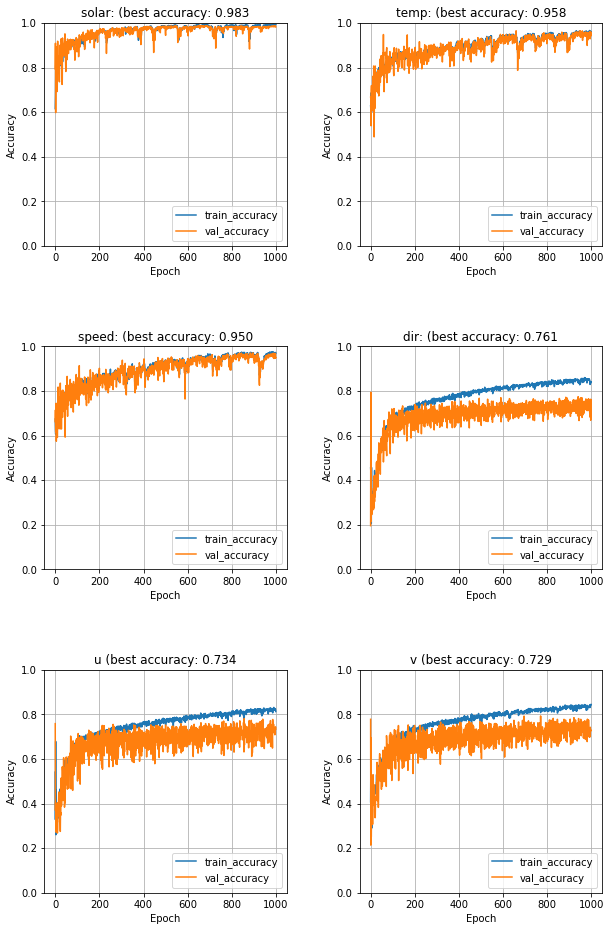

In [27]:
    
direct_classifier = {}

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.figure(figsize=(10, 16))
epochs = [1000,1000,1000,1000,1000,1000]
for ind,var in enumerate(variables):
    ax = plt.subplot(3, 2, ind+1)
    plt.subplots_adjust(hspace=0.45,wspace=0.3)
    num_inputs = xtrain.shape[1]
    num_outputs = ytrain.shape[1]
    direct_classifier[var] = Sequential()
    direct_classifier[var].add(layers.Dense(100, input_dim=num_inputs, kernel_initializer='normal', activation='relu'))
    direct_classifier[var].add(layers.Dense(50, kernel_initializer='normal', activation='relu'))
    direct_classifier[var].add(layers.Dense(1, kernel_initializer='normal',activation='sigmoid'))
    
    opt = 'adam'
    
    direct_classifier[var].compile(loss='binary_crossentropy', 
                     metrics = ['accuracy'],optimizer=opt)
    
    class_weight = {0:1,
            1:weight_fraction[ind]} 
    
    history = direct_classifier[var].fit(xtrain,label_train[:,ind],epochs=epochs[ind],
               class_weight = class_weight,batch_size=2000,
                     validation_data=(xval, label_val[:,ind]))
    
        
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.title('{} (best accuracy: {:0.3f}'.format(var,history.history['val_accuracy'][-1]))
    plt.ylim([0, 1])
    textstr = 'Best Validation Accuracy: {:0.3f}'.format(history.history['val_accuracy'][-1])

Load the data from the validation station and scale

In [28]:

filename = 'Station008_samples_to_check.xlsx'
test_samples = pd.read_excel(filename)

X_scale = x_scaler.transform(test_samples[variable_headers])
labels = test_samples[label_headers].values

Run the prediction for each class and then print the classification report

In [29]:

classification_val = {}
for ind,var in enumerate(variables):
    print('Classification Report for: {}'.format(var))

    classification_val[var] = direct_classifier[var].predict(X_scale)
    classification_val[var] = classification_val[var]>0.5
    print(classification_report(labels[:,ind],classification_val[var]))

Classification Report for: solar:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     16944
           1       0.00      0.00      0.00        43

    accuracy                           0.99     16987
   macro avg       0.50      0.49      0.50     16987
weighted avg       0.99      0.99      0.99     16987

Classification Report for: temp:


C:\Users\jmatt\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.99      1.00      1.00     16899
           1       0.00      0.00      0.00        88

    accuracy                           0.99     16987
   macro avg       0.50      0.50      0.50     16987
weighted avg       0.99      0.99      0.99     16987

Classification Report for: speed:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     16899
           1       0.00      0.00      0.00        88

    accuracy                           0.99     16987
   macro avg       0.50      0.50      0.50     16987
weighted avg       0.99      0.99      0.99     16987

Classification Report for: dir:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97     16653
           1       0.02      0.05      0.03       334

    accuracy                           0.93     16987
   macro avg       0.50      0.50      0.50     16987
weighted

Oddly, I did train a set of classifiers that work well, but the result was not repeatable.  This network was trained first on data that had been scaled by min/max to be between 0 and 1 but works to classify un-scaled data.  I have no explaination for this

In [30]:

from keras.models import load_model
for ind,var in enumerate(variables):
    filename = 'dir_class_model_{}.h5'.format(var)
    model = load_model(filename)
    cl = model.predict(X_scale)
    cl = cl>0.5
    print(classification_report(labels[:,ind],cl))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16944
           1       0.62      0.93      0.74        43

    accuracy                           1.00     16987
   macro avg       0.81      0.96      0.87     16987
weighted avg       1.00      1.00      1.00     16987

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     16899
           1       0.30      0.74      0.43        88

    accuracy                           0.99     16987
   macro avg       0.65      0.86      0.71     16987
weighted avg       1.00      0.99      0.99     16987

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     16899
           1       0.33      0.74      0.45        88

    accuracy                           0.99     16987
   macro avg       0.66      0.87      0.72     16987
weighted avg       1.00      0.99      0.99     16987

              preci